In [42]:
# from sklearn.datasets import load_breast_cancer
# import pandas as pd

# # Load the dataset
# data = load_breast_cancer()

# # Convert to a pandas DataFrame
# df = pd.DataFrame(data.data, columns=data.feature_names)

# # Add the target column
# df['target'] = data.target

In [43]:
# # Save the DataFrame to a CSV file
# df.to_csv('breast_cancer_data.csv', index=False)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


In [32]:

# Step 1: Load and preprocess the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Class distribution:\n", y.value_counts())

Class distribution:
 1    357
0    212
Name: count, dtype: int64


In [33]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Handle imbalanced data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Balanced class distribution:\n", y_train_balanced.value_counts())


Balanced class distribution:
 1    285
0    285
Name: count, dtype: int64


In [34]:
# Step 3: Build a more complex model

model = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden layer 1
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden layer 2
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4946 - loss: 2.7130 - val_accuracy: 0.8860 - val_loss: 2.2912
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7508 - loss: 2.2251 - val_accuracy: 0.9298 - val_loss: 2.1163
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 2.0241 - val_accuracy: 0.9561 - val_loss: 1.9748
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8548 - loss: 1.9116 - val_accuracy: 0.9386 - val_loss: 1.8581
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8920 - loss: 1.7797 - val_accuracy: 0.9474 - val_loss: 1.7581
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9444 - loss: 1.6590 - val_accuracy: 0.9474 - val_loss: 1.6684
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 1.6223 - val_accuracy: 0.9561 - val_loss: 1.5794
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9392 - loss: 1.5283 - val_accuracy: 0.9649 - val_loss: 1.

In [35]:

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9736841917037964


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


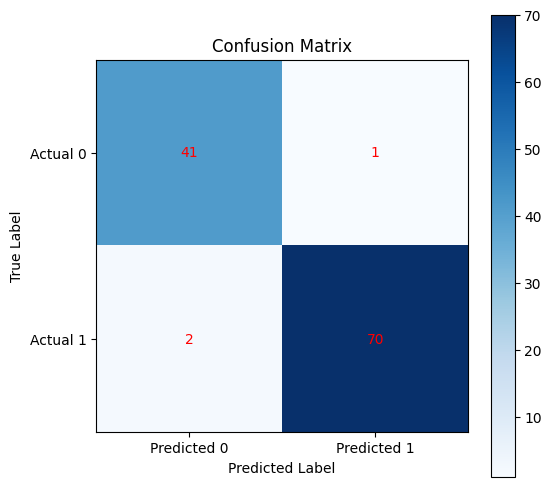

In [36]:

# Step 6: Additional Visualizations

# 1. Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Predicted 0", "Predicted 1"])
plt.yticks([0, 1], ["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


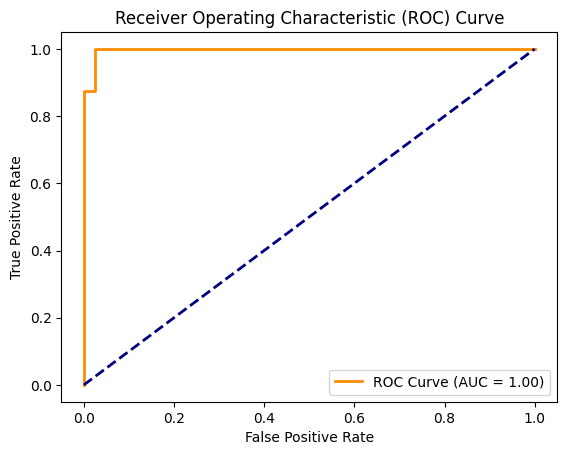

In [37]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


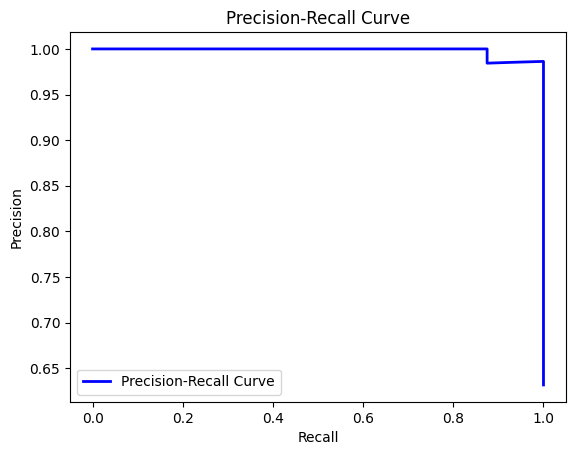

In [38]:

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


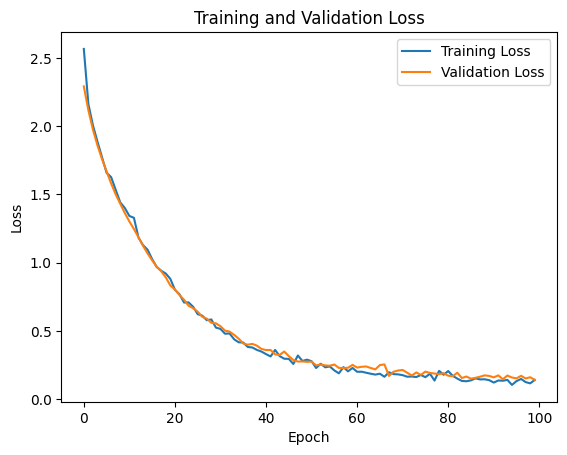

In [39]:

# 4. Loss Curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

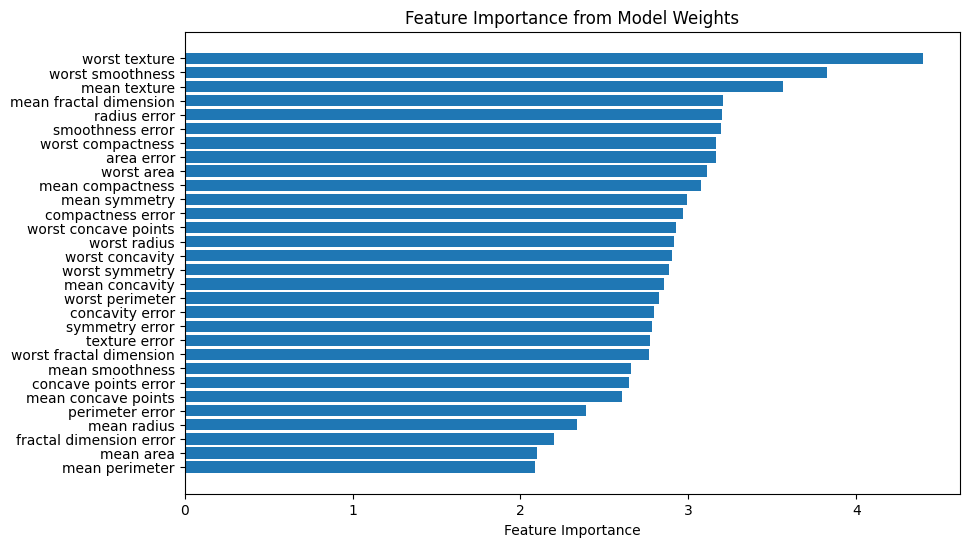

In [40]:


# 5. Feature Importance (using model weights)
weights = model.layers[0].get_weights()[0]
feature_importance = np.sum(np.abs(weights), axis=1)
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), np.array(data.feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Model Weights")
plt.show()

In [41]:
# Step 7: Save the model
model.save("complex_breast_cancer_model.h5")
print("Model saved as complex_breast_cancer_model.h5")

Model saved as complex_breast_cancer_model.h5
